In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
# Ejercicio 1. Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles: 
# Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo
# Percentiles 25, 75

In [ ]:
#moda

In [3]:
df = pd.read_csv("books.csv")

Principales estadísticos variables numéricas

In [12]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [13]:
df_numericas = df[["User Rating", "Reviews", "Price", "Year"]]
df_numericas.head(3)

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018


In [15]:
princ_esta = df.describe()                                                                  
princ_esta
# Elegimos df en vez de df_numericas porque automáticamente describe hace los estadísticos únicamente con las varibles numéricas

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Aquí encontramos los principales estadísticos de las variables numéricas de nuestro dataset:
- El valor 50% corresponde a la 'Mediana'.
- Observamos que la variable con menos desviación estándar es 'Year'. Esto tiene mucho sentido ya que los datos recogidos en nuestro df tienen un rango de 2009 - 2019, por lo que ya fueron "filtrados" previamente. Así, su dispersión es baja.
- La desviación típica (std) de la variable 'User Rating' es muy cercana a 0. Esto quiere decir que l@s usuari@s han valorado los libros de forma similar. Por lo tanto así también observamos que los percentiles 1 (en la tabla: 25%) y 3 (en la tabla: 75%) y la mediana (en la tabla: 50%) son valores muy semejantes.
- El valor mín de 'Price' es 0. Lo interpretamos como una falta de información/error en el registro del precio del libro o que hubo algún libro gratuito.



Separamos las variables categóricas

In [10]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [11]:
df_categoricas = df[["Name", "Author", "Genre"]]
df_categoricas.head(3)

,Name,Author,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction


In [19]:
df_numericas

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [20]:
##################### CÓMO QUITAR EXPONENTES
# Rango Intercualtílico
q3, q1 = np.percentile(df_numericas, [75,25], axis = 0)
iqr = q3 - q1
iqr     

array([3.00000e-01, 1.31952e+04, 9.00000e+00, 6.00000e+00])

El rango intercuartílico (iqr) es la diferencia entre el cuartil 3 y el cuartil 1.  
- IQR columna "User rating": Observamos que el iqr de la columna "User rating" es 0.3. Con esto, confirmamos lo dicho anteriormente: l@s usuari@s que han valorado los libros lo han hecho de forma similar. Much@s de ell@s han puesto la misma nota a cada libro. Es una medida robusta...
- IQR columna "Reviews": El iqr de la columna 'Reviews' es 13195 (aprox). Interpretamos que al ser un valor tan "dispar" hay unos libros que han recibido muchas opiniones y otros libros muy pocas. 

Tabla de frecuencias

In [31]:
df_num_sin_rew = df[["User Rating", "Price", "Year"]]

Boxplot

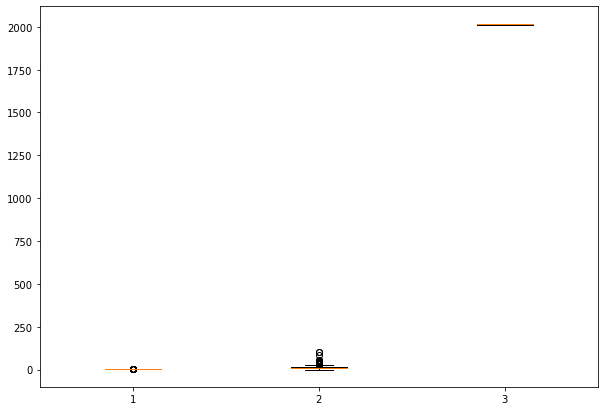

In [32]:
# Boxplot de algunas variables
fig = plt.figure(1, figsize= (10, 7))

ax = fig.add_subplot(111)                       # add_subplot porque tenemos varias columnas y queremos añadirlas todas a la figura.
bp = ax.boxplot(df_num_sin_rew)


Hemos intentando representar nuestras 4 columnas numéricas en un único boxplot pero hemos concluído que no tiene sentido. Las 4 columnas tienen rangos de valores muy diferentes por los que al intentar representarlos al mismo tiempo solo aparecen las columnas con valores muy grandes. Hemos pensado en representar las 4 columnas por separado.

In [30]:
df_numericas.head(1)

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016


In [ ]:
labels = ['User Rating', 'Reviews', 'Price', 'Year']
plt.subplots((2,2)

In [ ]:
#ejemplo
labels = ['Suspenso', 'Aprobado', 'Notable', 'Sobresaliente']
y1 = [1,5,4,2]
y2 = [7,2,3,6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='Grupo A')
rects2 = ax.bar(x + width/2, y2, width, label='Grupo b')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xticks(x,labels)
ax.legend()

fig.tight_layout()

plt.show()
